In [2]:
import pandas as pd
from pathlib import Path
import logging
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = Path(r'C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\preprocessed_results.csv')
df = pd.read_csv(filename).set_index('id').drop_duplicates(subset='name')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 23389271 to 6309729
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   node_id            101 non-null    object 
 1   name               101 non-null    object 
 2   full_name          101 non-null    object 
 3   private            101 non-null    bool   
 4   owner              101 non-null    object 
 5   html_url           101 non-null    object 
 6   description        101 non-null    object 
 7   fork               101 non-null    bool   
 8   url                101 non-null    object 
 9   forks_url          101 non-null    object 
 10  keys_url           101 non-null    object 
 11  collaborators_url  101 non-null    object 
 12  teams_url          101 non-null    object 
 13  hooks_url          101 non-null    object 
 14  issue_events_url   101 non-null    object 
 15  events_url         101 non-null    object 
 16  assignees_url  

In [5]:
ids_to_check = [
23468876,
236661502,
104569445,
148657183,
80764246,
202580388,
186872119,
275794599,
69400415,
278175856,
198119545,
261086130,
86715491,
70790978,
1678015,
62207281,
65324353,
46355863,
213480284,
247768523,
98871435,
11591264,
118264731,
123977530,
156401841,
198628357,
1885237,
184809315,
25037129,
90264407,
71996613,
64942583,
25928850,
127010483,
253993655,
18031064,
82291672,
59207352,
73872834,
110717885,
]

In [6]:
stats = df.loc[ids_to_check,['name', 'html_url', 'size', 'stargazers_count', 'forks_count']].copy()

In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 23468876 to 110717885
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              40 non-null     object
 1   html_url          40 non-null     object
 2   size              40 non-null     int64 
 3   stargazers_count  40 non-null     int64 
 4   forks_count       40 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ KB


In [8]:
stats.set_index('name')['stargazers_count'].sort_values(ascending=False)

name
prophet             12256
statsmodels          5931
tsfresh              5326
sktime               3467
hmmlearn             2185
gluon-ts             1679
stumpy               1640
hypertools           1610
tslearn              1446
pywt                 1053
neural_prophet       1038
pyts                  855
pmdarima              800
darts                 699
arch                  633
ruptures              588
cesium                512
scikit-multiflow      480
dtaidistance          477
seglearn              413
linearmodels          398
PyEMD                 393
sktime-dl             354
pydlm                 352
deltapy               341
atspy                 327
mcfly                 311
pytorch-ts            282
pyaf                  280
flow-forecast         255
banpei                225
luminaire             189
tftb                  181
pyFTS                 146
pycwt                 140
pyodds                132
deeptime              129
matrixprofile         123
nolds  

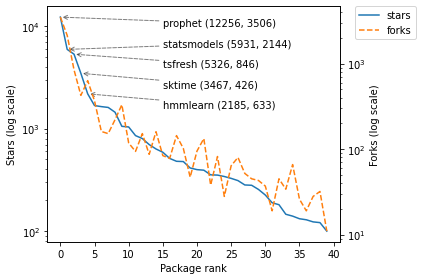

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
s = stats.set_index('name')[['stargazers_count','forks_count']].sort_values(ascending=False, by='stargazers_count')
s = s.reset_index()
#s = s[s>=1000]
hs, = ax.plot(s.index, s.stargazers_count, label='stars')
ax1 = ax.twinx()
hf, = ax1.plot(s.index, s.forks_count, linestyle='--', color='C1', label='forks')
ax.set_yscale('log')
ax1.set_yscale('log')
ax.set_xlabel('Package rank')
ax.set_ylabel('Stars (log scale)')
ax1.set_ylabel('Forks (log scale)')

# annotate the top 10 packages
top = 5
y = [10**(4-i/top) for i in range(top)]
for i in range(top):
    text = s.name.iloc[i]
    stars = s.stargazers_count.iloc[i]
    forks = s.forks_count.iloc[i]
    ax.annotate(f'{text} ({stars}, {forks})',
                xy=(i, stars), xycoords='data',
                xytext=(15, y[i]), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3",
                               alpha=0.5, linestyle='--'),
                alpha=1,
                )

ax.legend(handles=[hs,hf],labels=['stars','forks'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('../latex/images/distribution-stars.pdf')

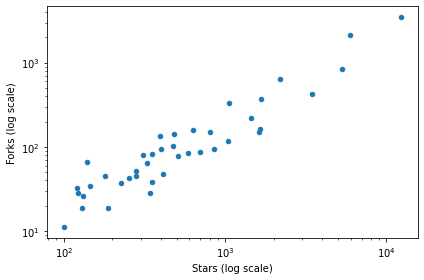

In [19]:
fig, ax = plt.subplots(figsize=(6,4))

#s = s[s>=1000]
s= stats.set_index('name')[['stargazers_count', 'forks_count']]

s.plot.scatter(x='stargazers_count', y='forks_count', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Stars (log scale)')
ax.set_ylabel('Forks (log scale)')

# annotate the top 10 packages
plt.tight_layout()
plt.savefig('../latex/images/distribution-stars.pdf')